# COVID DIAGNOSIS PREDICTION

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

## Reading the dataset

In [2]:
df = pd.read_csv('C:/Users/Vishal/Downloads/corona_tested_individuals_ver_0083.english.csv')

C:\Users\Vishal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# first few values of dataset
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [4]:
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [5]:
#checking for columns with NaN values
for column in df.columns:
    print(column, df[column].isnull().sum())

test_date 0
cough 0
fever 0
sore_throat 0
shortness_of_breath 0
head_ache 0
corona_result 0
age_60_and_above 547644
gender 92886
test_indication 0


In [6]:
#dropping all the rows with NaN values
df.dropna()

#dropping the rows with 'other' values
df = df[df.corona_result != 'other']

In [7]:
#selecting random 1% dataset for our training
df = df.sample(frac = 0.01, random_state = 1)

In [8]:
#categorising the values in form of 0 and 1
df['corona_result'] = pd.get_dummies(df['corona_result'], drop_first = True)
df['age_60_and_above'] = pd.get_dummies(df['age_60_and_above'], drop_first = True)
df['gender'] = pd.get_dummies(df['gender'], drop_first = True)

In [9]:
#dropping the unneccessary columns
df.drop(['test_date', 'test_indication'], axis = 1, inplace = True)

In [10]:
df.head() # checking the dataset

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
2171496,0,0,0,0,0,0,0,1
1159651,0,0,0,0,0,0,0,0
2492620,0,0,0,0,0,0,0,1
315193,0,0,0,0,0,0,0,1
2277417,0,0,0,0,0,0,0,0


In [11]:
# reseting indexing back from 0
df.reset_index(drop = True, inplace = True)

In [12]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0


## Visualising the data

<AxesSubplot:xlabel='corona_result', ylabel='count'>

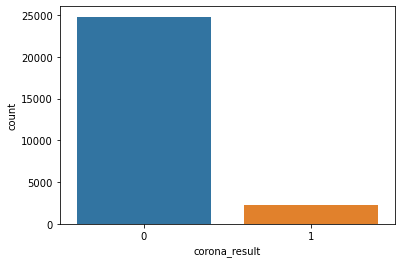

In [13]:
sns.countplot(x = 'corona_result', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

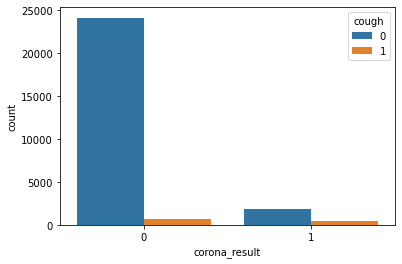

In [14]:
sns.countplot(x = 'corona_result', hue = 'cough', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

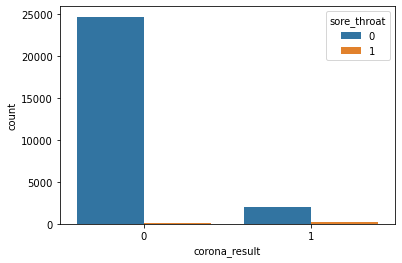

In [15]:
sns.countplot(x = 'corona_result', hue = 'sore_throat', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

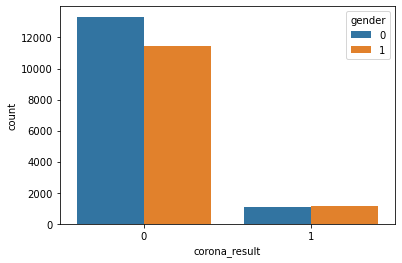

In [16]:
sns.countplot(x = 'corona_result', hue = 'gender', data = df)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

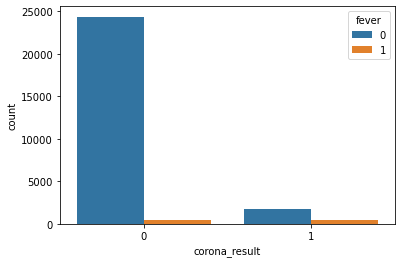

In [17]:
sns.countplot(x = 'corona_result', hue = 'fever', data = df)

## Setting up feature vector and target value

In [18]:
# setting our feature vector
X = df.drop(['corona_result'], axis = 1)

# setting our target value
y = df['corona_result']

In [19]:
# importing libraries to train the model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [20]:
# setting up for svm model
svm_model = svm.SVC(gamma = 'auto', C = 100, kernel = 'rbf')

# preparing our train set and test set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Logistic Regression Model

In [21]:
# training our logistic regression model
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

#testing out logistic regression model
pred_y = log_reg.predict(test_x)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4939
           1       0.72      0.17      0.28       464

    accuracy                           0.92      5403
   macro avg       0.82      0.58      0.62      5403
weighted avg       0.91      0.92      0.90      5403



In [23]:
# checking our logistic model accuracy
accuracy_score(pred_y, test_y)


0.9230057375532111

## Support Vector Classifier Model

In [24]:

# training our svm model
svm_model.fit(train_x, train_y)

SVC(C=100, gamma='auto')

In [25]:
# predicting for our test values through svm model
y_pred = svm_model.predict(test_x)

In [26]:
# checking for our svm model accuracy
accuracy_score(y_pred, test_y)

0.9254118082546733

In [27]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize = (5, 5), dpi = 80)
confusion_matrix(test_y, y_pred)

array([[4858,   81],
       [ 322,  142]], dtype=int64)

<Figure size 400x400 with 0 Axes>

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4939
           1       0.64      0.31      0.41       464

    accuracy                           0.93      5403
   macro avg       0.79      0.64      0.69      5403
weighted avg       0.91      0.93      0.91      5403

